## Objective: 

Develop a predictive model using machine learning to detect customer churn in a financial institution. This model aims to reduce revenue loss by identifying potential churn and enabling proactive customer retention strategies. Ultimately, it enhances business performance by mitigating customer attrition.

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset

df = pd.read_csv('Churn_Modelling.csv')

df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6456,6457,15755978,Tseng,606,France,Male,31,10,0.00,2,1,0,195209.40,0
5238,5239,15660840,Kalinin,723,France,Male,30,3,124119.54,1,1,0,162198.32,0
8185,8186,15812356,Doherty,722,Germany,Female,40,6,89175.06,2,0,1,152883.95,0
483,484,15578186,Pirozzi,486,Germany,Male,37,9,115217.99,2,1,0,144995.33,0
8216,8217,15637717,Lockington,704,Germany,Male,41,4,109026.80,2,1,1,43117.10,0


## Dataset Info: The dataset provided consists of the following features-

- CustomerId: Unique identifier for each customer
- Surname: Surname of the customer
- CreditScore: Credit score of the customer
- Geography: Customer's country of residence
- Gender: Customer's gender
- Age: Age of the customer
- Tenure: Number of years the customer has been with the institution
- Balance: Bank account balance of the customer
- NumOfProducts: Number of products/services the customer has subscribed to
- HasCrCard: Whether the customer has a credit card (1 if yes, 0 if no)
- IsActiveMember: Whether the customer is an active member (1 if yes, 0 if no)
- EstimatedSalary: Estimated salary of the customer
- Exited: Whether the customer has churned (1 if yes, 0 if no)

In [3]:
# DataFrame's structure and attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# identify duplicated rows

df.duplicated().sum()

0

In [5]:
# count missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# number of unique values for each column in a DataFrame 

df.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Find features with one value

for column in df.columns:
    print(column,df[column].nunique())

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


## My findings - 

- Dataset is consist of 10000 instances and 14 attributes
- most of the features are numerical 
- no null values are found in the dataset 
- no duplicated values 
- all the values are unique 
- There are no features with one values, at least 2 values. 



# Exploratory Data Analysis and Pre-Processing

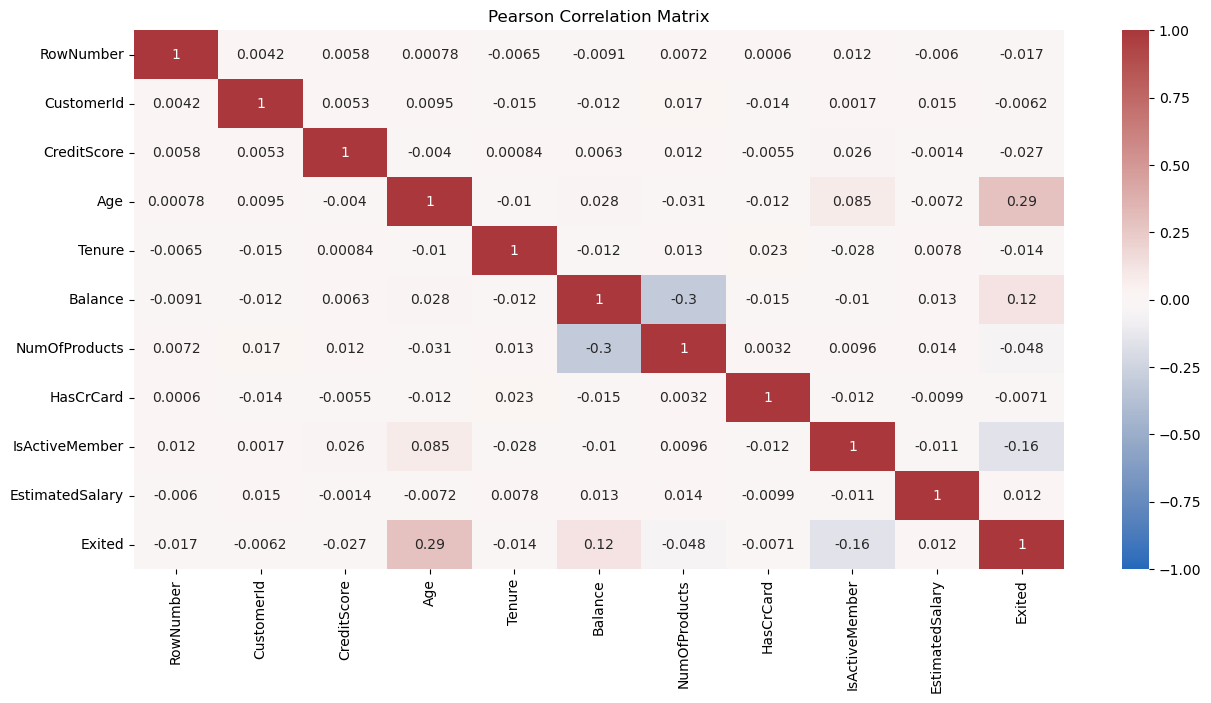

In [11]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Create a heatmap to visualize the correlations
fig = plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix,annot=True, vmin= -1, vmax = 1, center = 0, cmap = 'vlag')
plt.title("Pearson Correlation Matrix")
plt.show()

### My findings - 

- We don't need the row number, customer id and surname column. So. going to drop these column. 



# Dropping the columns that doesn't contribute meaningfully to the prediction. 

In [15]:
# data cleaning 

df1 = df.copy()

df1 = df1.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [17]:
# statistics for all numerical columns

df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Visualizing the Output variable - EXITED

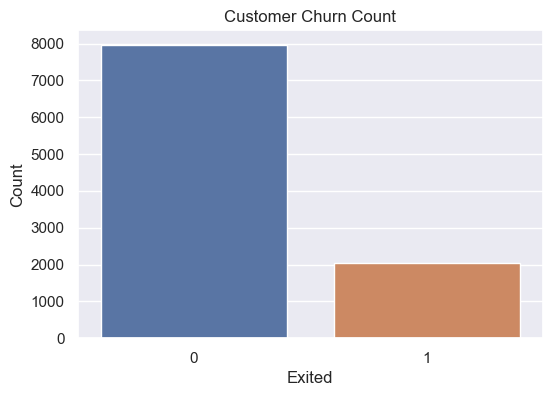

In [21]:
# count plot for the 'exited' column
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x="Exited")

# Customize the plot
plt.title("Customer Churn Count")
plt.xlabel("Exited")
plt.ylabel("Count")

# Show the plot
plt.show()

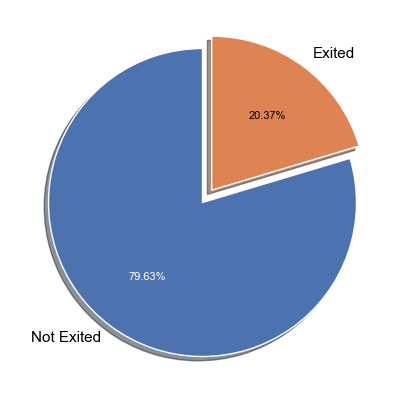

In [25]:
# visualizing the output variable 

values = df1.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)
explode = (0, 0.10)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()